**Data Augmentation Comparison**

Import Library

In [ ]:
from utils import fashionmnist_dataloader,train_cutmix, val
from utils import ResNet18

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# baseline cnn model for fashion mnist
import numpy as np

import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import Adam


**1. Initialize Device**

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

device

device(type='cuda')

*CutMix*

In [ ]:
# Define CutMix Dataloader
batch_size = 50

cutmix_train_loader, cutmix_val_loader, cutmix_test_loader = fashionmnist_dataloader(batch_size,basic_aug = False)

100%|██████████| 26421880/26421880 [00:01<00:00, 15249647.14it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 266365.90it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5068006.02it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9941195.67it/s]
/opt/conda/lib/python3.10/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 26421880/26421880 [00:01<00:00, 16935658.90it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 269354.12it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5005286.61it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9445440.50it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Define model

In [ ]:
num_classes = 10

In [ ]:
# For CutMix
criterion_cutmix = nn.CrossEntropyLoss()
model_cutmix = ResNet18(num_classes).to(device)
optimizer_cutmix = Adam(model_cutmix.parameters(), lr=3e-4)

model_cutmix

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 178MB/s]


ResNet18(
  (model): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (downsample): Identity()
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, mome

*Start training* **( T^T )**

CutMix part

In [ ]:
#CutMix
num_epochs=10
print("CutMix")
cutmix_train_losses, cutmix_test_losses = [], []
cutmix_train_accuracies, cutmix_test_accuracies = [], []

for epoch in range(1, num_epochs + 1):
        train_acc, train_loss = train_cutmix(model_cutmix, criterion_cutmix, cutmix_train_loader, optimizer_cutmix, epoch, 2.5, device)
        test_acc, test_loss = val(model_cutmix, criterion_cutmix, cutmix_val_loader, device)

        cutmix_train_accuracies.append(train_acc)
        cutmix_train_losses.append(train_loss)
        cutmix_test_accuracies.append(test_acc)
        cutmix_test_losses.append(test_loss)


CutMix
Train Epoch: 1	Average Loss: 0.746700	Accuracy: 73.39%
Val Loss: 0.4558, Val Accuracy: 83.20%
Train Epoch: 2	Average Loss: 0.517566	Accuracy: 81.55%
Val Loss: 0.3096, Val Accuracy: 88.91%
Train Epoch: 3	Average Loss: 0.461144	Accuracy: 83.58%
Val Loss: 0.2889, Val Accuracy: 89.53%
Train Epoch: 4	Average Loss: 0.426749	Accuracy: 84.80%
Val Loss: 0.4197, Val Accuracy: 85.46%
Train Epoch: 5	Average Loss: 0.406363	Accuracy: 85.46%
Val Loss: 0.2408, Val Accuracy: 91.33%
Train Epoch: 6	Average Loss: 0.384689	Accuracy: 86.36%
Val Loss: 0.2802, Val Accuracy: 89.70%
Train Epoch: 7	Average Loss: 0.368613	Accuracy: 86.72%
Val Loss: 0.2370, Val Accuracy: 91.38%
Train Epoch: 8	Average Loss: 0.353785	Accuracy: 87.22%
Val Loss: 0.2320, Val Accuracy: 91.58%
Train Epoch: 9	Average Loss: 0.335885	Accuracy: 87.90%
Val Loss: 0.2195, Val Accuracy: 92.12%
Train Epoch: 10	Average Loss: 0.327953	Accuracy: 88.41%
Val Loss: 0.2632, Val Accuracy: 90.92%


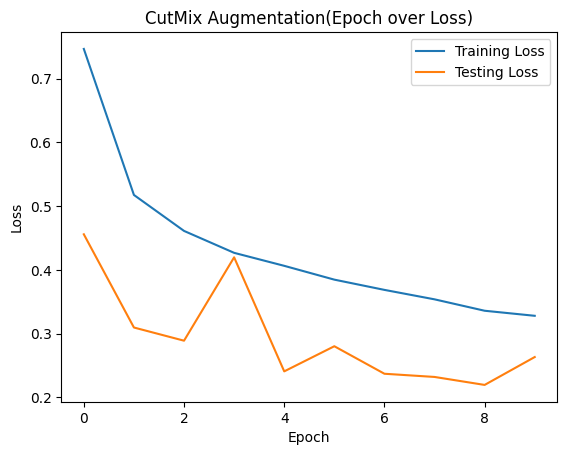

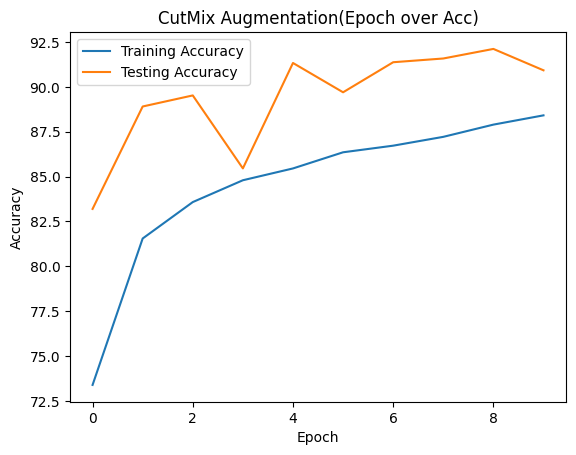

In [ ]:
plt.plot(cutmix_train_losses, label="Training Loss")
plt.plot(cutmix_test_losses, label="Testing Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("CutMix Augmentation(Epoch over Loss)")
plt.show()


plt.plot(cutmix_train_accuracies, label="Training Accuracy")
plt.plot(cutmix_test_accuracies, label="Testing Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("CutMix Augmentation(Epoch over Acc)")
plt.legend()
plt.show()